In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore')

Python'da warnings modülünü kullanarak uyarıları yönetebiliriz.
warnings.simplefilter(action='ignore') ifadesi, tüm uyarıları bastırır ve konsolda görünmelerini engeller.

- Numpy ve Pandas: Sayısal hesaplamalar ve veri manipülasyonu için.
- Matplotlib ve Seaborn: Veri görselleştirme için.
- Warnings: Uyarıları bastırmak için.

In [4]:
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Dataframe hakkında genel bir bilgiye ulaştık.

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Dataframe hakkında özet bir bilgi elde ettik.

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.head(10) #ilk 10 değeri görürüz.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Tüm veri tiplerinin isimlerini verir.

In [10]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

**Her bir işlemden toplamda kaç tane olduğunu görmemizi sağlar.**

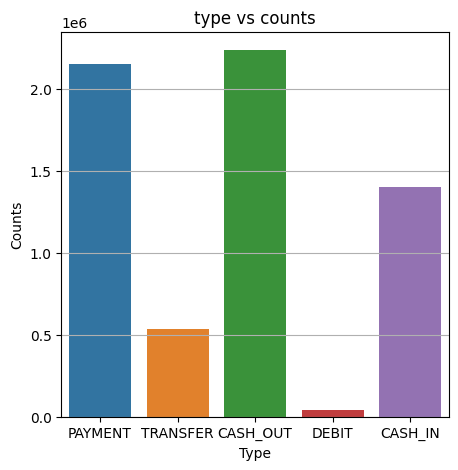

In [11]:
plt.figure(figsize=(5,5))
plt.title('type vs counts')
sns.countplot(data=df,x='type')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

**Her bir işlemin tipine ve sayısına göre grafiğini verir.**

In [12]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [13]:
df['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

tip ifadelerinin isimleri sayılarla değiştirildi.

In [14]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

dolandırıcılık oranı bulundu.

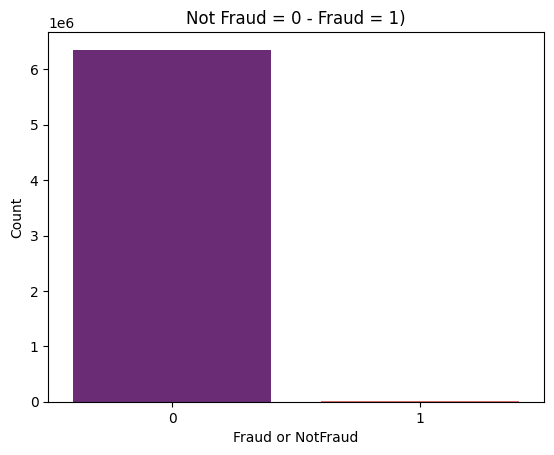

In [15]:
isFraud_counts = df['isFraud'].value_counts()


sns.barplot(x=isFraud_counts.index, y=isFraud_counts.values, palette='magma')
plt.xlabel('Fraud or NotFraud')
plt.ylabel('Count')
plt.title('Not Fraud = 0 - Fraud = 1)')
plt.xticks()
plt.show()

In [16]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

Sayı içermeyen kısımlar çıkartıldı.

In [17]:
print(df.columns)

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [18]:
df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

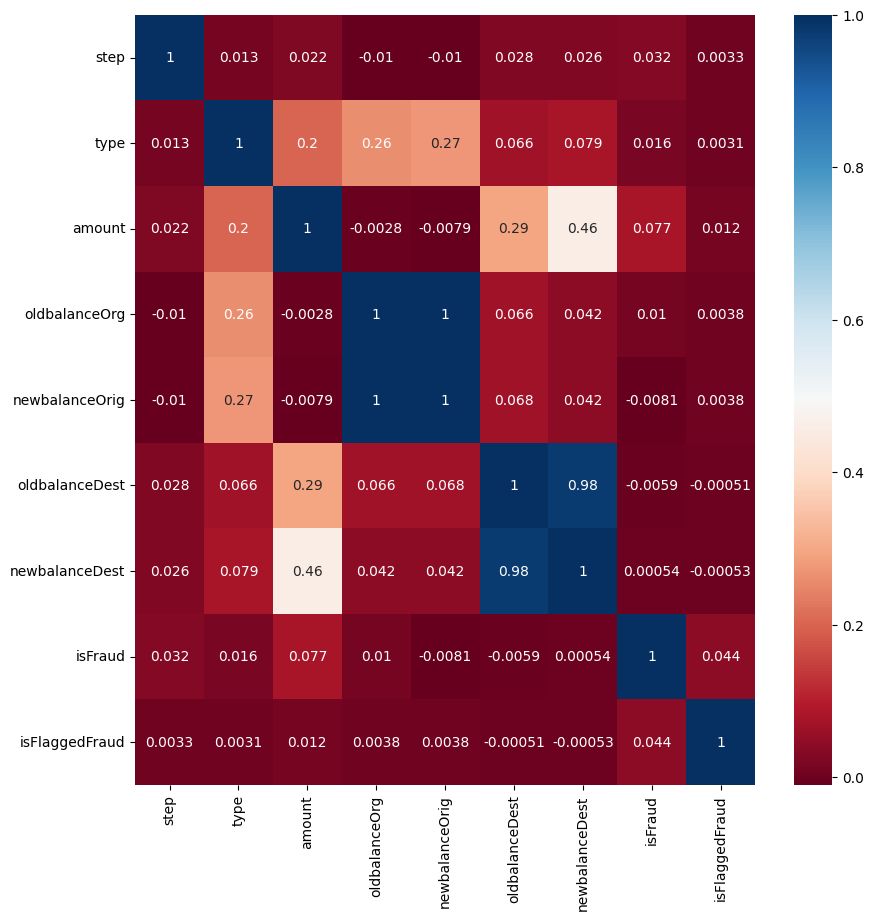

In [19]:
plt.figure(figsize = (10, 10))

sns.heatmap(data = df.corr(), annot = True, cmap = 'RdBu')

kolerasyon görselleştrildi.

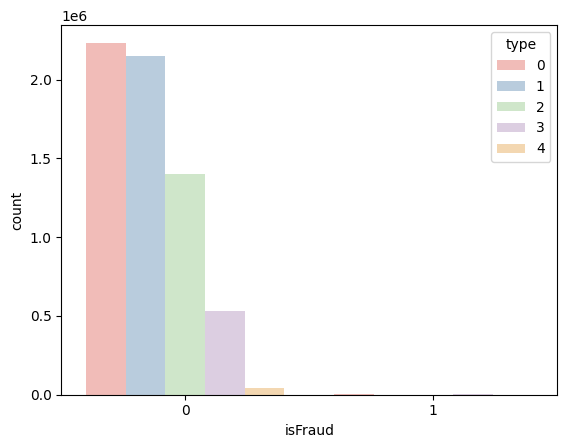

In [20]:
plt.figure()
sns.countplot(x='isFraud', hue='type', data=df, palette='Pastel1')
plt.xticks([0,1], ['0', '1'])
plt.show()

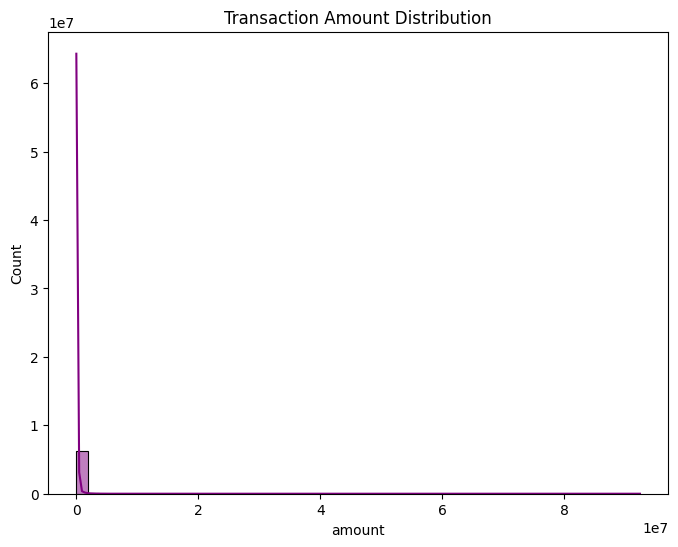

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.show()


**1 - Lojistik Regresyon**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import optuna

In [23]:

x = df.drop(['isFraud'], axis=1)
print('X shape is : ' , x.shape)



y = df['isFraud']
print('Y shape is : ' , y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)
print()

print('X_train shape:' , x_train.shape)
print('X_test shape: ' , x_test.shape)
print('y_train shape: ' , y_train.shape)
print('y_test shape: ' , y_test.shape)

X shape is :  (6362620, 8)
Y shape is :  (6362620,)

X_train shape: (1908786, 8)
X_test shape:  (4453834, 8)
y_train shape:  (1908786,)
y_test shape:  (4453834,)


In [24]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) 

Model_LR = LogisticRegression()
Model_LR.fit(x_train_scaled, y_train)
y_pred_LR = Model_LR.predict(x_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(x_train_scaled, y_train)
Test_Accuracy = Model_LR.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')



Training accuracy: 99.92 %
Testing accuracy: 99.92 %


çapraz doğrulama

In [25]:
# Çapraz doğrulama ile performansı değerlendirme
cv_scores = cross_val_score(Model_LR, x_train_scaled, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.99915915 0.99920892 0.99914081 0.99920368 0.99916963]
Mean CV Score: 0.9991764399033137


Desicion Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
Model_DT = DecisionTreeClassifier()
Model_DT.fit(x_train_scaled, y_train)
y_pred_DT = Model_DT.predict(x_test_scaled)

Train_Accuracy = Model_DT.score(x_train_scaled, y_train)
Test_Accuracy = Model_DT.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')



Training accuracy: 100.00 %
Testing accuracy: 99.96 %


**Gözetimsiz Öğrenme Algoritmaları**

1-K-ortalama

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode


kmeans = KMeans(n_clusters=len(set(y_train)), random_state=42)
kmeans.fit(x_train_scaled)

#Tahminde bulunma
train_clusters = kmeans.predict(x_train_scaled)
test_clusters = kmeans.predict(x_test_scaled)

# Kümeleri sınıf etiketleriyle eşleştirme
def cluster_to_labels(clusters, true_labels):
    labels = np.zeros_like(clusters)
    for i in range(len(np.unique(clusters))):
        mask = (clusters == i)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

# Eğitim ve test kümelerini sınıf etiketlerine çevirme
train_labels = cluster_to_labels(train_clusters, y_train)
test_labels = cluster_to_labels(test_clusters, y_test)

# Eğitim ve test doğruluğunu hesaplama
train_accuracy = accuracy_score(y_train, train_labels)
test_accuracy = accuracy_score(y_test, test_labels)

print(f'Training accuracy: {train_accuracy*100:.2f} %')
print(f'Testing accuracy: {test_accuracy*100:.2f} %')


Training accuracy: 99.87 %
Testing accuracy: 99.87 %


Eğitim setinde farklı küme etiketleri var. Bu, modelin verileri en az iki farklı kümeye ayırdığını gösteriyor.
Test Kümesi: Test setindeki tüm etiketlerin çoğunlukla 0 olması, modelin büyük bir kısmını tek bir kümeye yerleştirdiğini gösterir.
Eğitim setinde birden fazla küme bulunmasına rağmen, test setinde büyük ölçüde tek bir kümeye ait verilerin yer alması, modelin test verisi üzerinde yeterince çeşitlilik olmadığını veya modelin test setini yetersiz bir şekilde temsil ettiğini gösteriyor olabilir.
